# Why optimization convergence is important

## Main message
Getting a converged optimization result is important so you are comparing and understanding designs that are optimal. This gives you an apples-to-apples comparison.

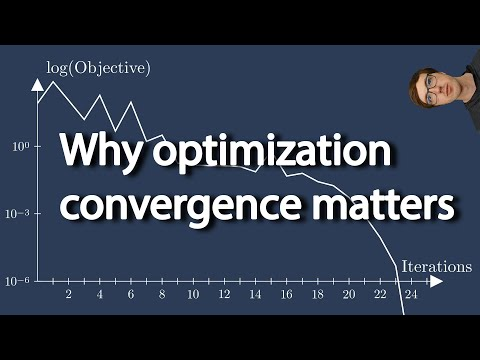

In [1]:
from IPython.display import YouTubeVideo; YouTubeVideo('gvVKDPsdN-o', width=1024, height=576)

## What do we mean by convergence?
When we say convergence, we mean that we have a reasonable expectation that the current design point is optimal. In strict mathematical terms, this means that the point satisfies the [Karush-Kuhn-Tucker (KKT) conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions). But please don't get hung up on that -- you don't need to be a mathematician to understand if your design is converged.

When I say convergence, I just mean that the optimizer has had enough time to chug along at the problem and has settled into an optimal point. If you're using a gradient-based optimization method, this usually means that the derivatives (Jacobian) are of magnitude 0, suggesting that there is an extrema there. Additionally, if the matrix of the 2nd derivatives (Hessian) are positive definite, then that suggests that the extrema is a minima, which is what we're seeking.

Now, a less mathy and a more practical way of viewing convergence is thinking that it means when the design variables and functions of interest are not changing iteration to iteration. When the optimizer is converging, the values will appear to level out when it's near a local minima. Sometimes this is a red herring, and the optimizer might power through and continue decreasing the objective value, but it's usually a good sign that the optimizer has found a minima.

It pays to look at the change in function values at a very precise level. When we talk about convergence, you often want to deal with relatively tight tolerances, maybe on the order 10^-6 or tighter. It would be challenging to visually see the functions converge there, so you should look at the actual numbers coming out, or visually examine the log of the function values.

See Sec. 4.1.4 in [Engineering Design Optimization](https://mdobook.github.io/) for more theoretical details on convergence. 

## Convergence means that the constraints are valid
You need to get a converged results (and verify that it's converged!) to ensure that all constraints are satisfied. This means that the physics are respected within your model and the resulting design is within the feasible space. At any given point in the optimization process *except* at the optimum, these constraints may not be satisfied. Some practical examples of what it means when your design constraints are not satisfied, it might mean that your aircraft lift doesn't equal your weight, so your airplane might fall out of the sky. Or maybe your structure might break if your structural constraints are not satisfied! So convergence is important to ensure that the constraints are satisfied.

Sec. 5.3 in [Engineering Design Optimization](https://mdobook.github.io/) offers more detail on convergence for constrained problems.

## Converged results mean you can compare different design points fairly
When you are running multiple optimization cases and comparing resulting designs between them, you must make sure each case converged successfully. If they didn't, you'd be comparing apples to aardvarks. Non-converged optimization cases are by definition non-optimal, so they wouldn't produce a fair comparison. This is especially evident when looking at parameter sweeps of optimizations.

Imagine a case where you want to investigate how a design variable affects optimal designs. You can perform a series of optimizations with different design variables while individually varying that specific design variable of interest, and then compare results. Let me explain with an example. Let's say you want to optimize a small remote-controlled aircraft to carry softballs. You might optimize the wingspan, chord, and twist for a given number of softballs stored in the fuselage. The optimal aircraft carrying two softballs will look different than the aircraft that carries six softballs. Is it worth carrying more softballs, though? To effectively compare these designs in a fair way, you'd want to optimize each design. Once you have converged optimizations, you can then draw a conclusion based on the resulting designs and corresponding performance.

This is also relevant when performing [](../Optimization/multiobjective) and when creating a Pareto front. If you have well-converged solutions, then your Pareto front is correct, and in most cases it will appear smooth. This allows you to better interpret the resulting designs and make an informed decision on which design to select to move forward. This is a very effective way to explore the design space, but requires multiple well-converged optimizations.